# Testing CP Decomposition Algorithms

- `tensorly`
    - ALS
    - Randomised 
    - Robust Tensor Power Iteration

In [38]:
import numpy as np
import tensorly as tl
import matplotlib.pyplot as plt
from tensorly.decomposition import parafac
from tensorly.cp_tensor import cp_to_tensor
from tensorly.decomposition import non_negative_parafac

%load_ext autoreload
%autoreload 2




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%cd ..

c:\Users\x390\Documents\UCL\YEAR 4\Masters\Tensor-Decompositions-OPM-MEG


In [68]:
tensor = np.random.normal(0,500,(195,121,7,100))

tensor = tensor.astype(np.float32)

print(f'Shape of tensor: {tensor.shape}')

Shape of tensor: (195, 121, 7, 100)


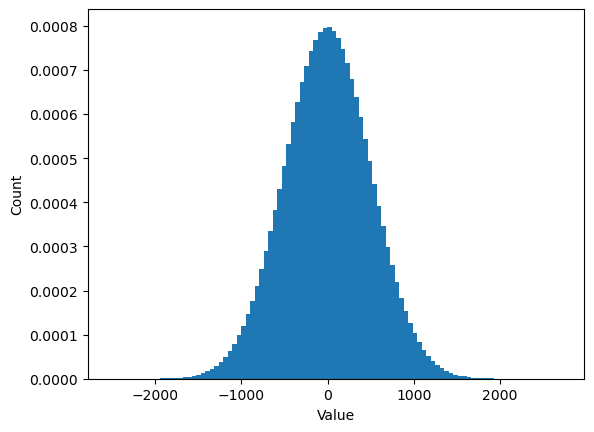

In [7]:
plt.hist(tensor.ravel(), bins=100,density=True)
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

## ALS

In [91]:
from tensorly.datasets.data_imports import load_covid19_serology

In [92]:

data = load_covid19_serology()

In [95]:
X = data.tensor

In [107]:
import time
from tqdm import tqdm
from src.utils.errors import variance_explained


In [109]:
Ranks = range(40)

compute_times_ALS = []
errors_ALS = []

for i in tqdm(Ranks):
    i += 1
    start_cpu = time.perf_counter()
    
      
    cp_tensor = non_negative_parafac(X, rank=i,
        init='svd',tol=1e-10)
    
    end_cpu = time.perf_counter()
    compute_times_ALS.append(end_cpu - start_cpu)
    
    # Store the final relative error 
    reconstructed_tensor = cp_to_tensor(cp_tensor)
    error = variance_explained(X,reconstructed_tensor)
    errors_ALS.append(error)
    

100%|██████████| 40/40 [00:44<00:00,  1.12s/it]


Text(0, 0.5, 'Error')

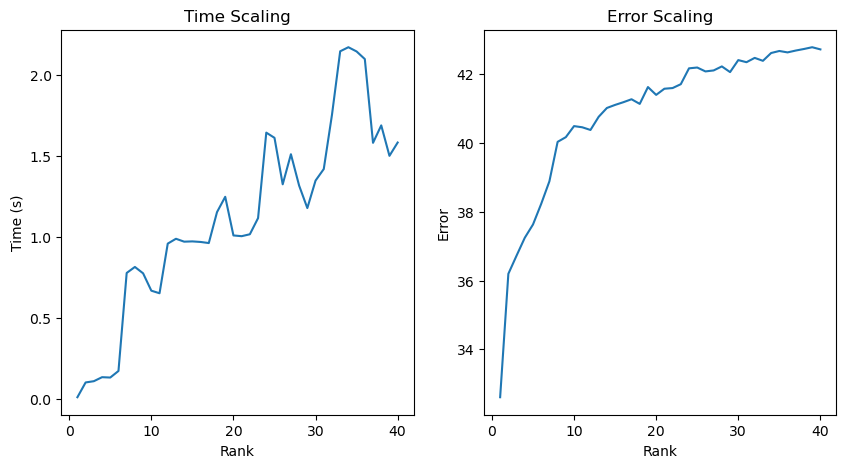

In [111]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot([i+1 for i in Ranks], compute_times_ALS) 
ax[0].set_title("Time Scaling")
ax[0].set_xlabel('Rank')
ax[0].set_ylabel('Time (s)')

ax[1].plot([i+1 for i in Ranks], errors_ALS) 
ax[1].set_title("Error Scaling")
ax[1].set_xlabel('Rank')
ax[1].set_ylabel('Error')

In [124]:
import h5py

mat_path = "data\choice_pow_trial_chan_fbin_time_ds500.mat"

with h5py.File(mat_path, "r") as f:

    # --- main data ---
    Pow = np.array(f["Pow"])              # HDF5 order: (time, bin, chan, trial)

    freq = np.array(f["freq"]).squeeze()
    time = np.array(f["time"]).squeeze()
    fbins = np.array(f["fbins"])
    freqs_hz = np.array(f["freqs_hz"]).squeeze()

    ds_fs = float(np.array(f["ds_fs"]).squeeze())
    fs_orig = float(np.array(f["fs_orig"]).squeeze())

    # --- channel labels (MATLAB cellstr) ---
    ch_names_refs = f["chan_lbl"][()]
    chan_lbl = []
    for r in ch_names_refs.flatten():
        s = f[r][()]
        chan_lbl.append(s.tobytes().decode("utf-16le").rstrip("\x00"))

    # --- MNE metadata ---
    mne_grp = f["mne"]

    ch_names_refs = mne_grp["ch_names"][()]
    mne_ch_names = []
    for r in ch_names_refs.flatten():
        s = f[r][()]
        mne_ch_names.append(s.tobytes().decode("utf-16le").rstrip("\x00"))

    ch_pos_m = np.array(mne_grp["ch_pos_m"], dtype=float)
    if ch_pos_m.shape[0] == 3 and ch_pos_m.shape[1] != 3:
        ch_pos_m = ch_pos_m.T  # (n_chan, 3)

    coord_frame_raw = mne_grp["coord_frame"][()]

In [140]:
is_positive = np.all(Pow > 1e3)

print(is_positive)

False


In [143]:
Pow = np.array(Pow)
Pow.shape

log_Pow = np.log(Pow) 

In [115]:
log_Pow.shape

log_Pow =log_Pow.T

In [ ]:
weights, factors = cp_tensor

A,B,C,D = factors

In [ ]:
from src.utils.plots import plot_factors

In [ ]:
plot_factors(A,B,C,D)